## PRINCIPAL COMPONENT ANALYSIS

Consider daily closing prices of the “FANG” stocks from 1/1/2019 until 12/1/2019

Facebook (FB)

Apple (AAPL)

Netflix (NFLX)

Google (GOOG)

(you can download the closing prices from Yahoo Finance)

+ Determine daily return of these stocks
+ Calculate the four Principal Components of these daily returns
+ Standardize the data and calculate the correlation matrix
+ Calculate the four Principal Components of the standardized daily returns

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import pandas_datareader as pdr
import datetime

### Determine daily return of these stocks

In [11]:
stocks = ['FB', 'AAPL', 'NFLX', 'GOOG']
# stocks = 'FB'
start = datetime.datetime(2019,1, 1)
end = datetime.datetime(2019,12, 1)
flag = 0
for stock in stocks:
    if flag == 0:
        price_df = pdr.DataReader(stock, 'yahoo',start,end)
        price_df = price_df[['Adj Close']]
        
        flag = 1
    else:
        
        price_df = pd.merge(price_df, pdr.DataReader(stock, 'yahoo',start,end)[['Adj Close']], on='Date')
price_df.columns = stocks

In [16]:
stocks_ret = price_df.pct_change(1) 
stocks_ret = stocks_ret[1:]
stocks_cov = stocks_ret.cov()
stocks_ret.head()

,FB,AAPL,NFLX,GOOG
Date,,,,
2019-01-03,-0.029039,-0.099607,0.013226,-0.028484
2019-01-04,0.047138,0.042689,0.097234,0.053786
2019-01-07,0.000725,-0.002226,0.059717,-0.002167
2019-01-08,0.032452,0.019063,0.015634,0.007385
2019-01-09,0.011927,0.016982,-0.000968,-0.001505


### Calculate the four Principal Components of these daily returns

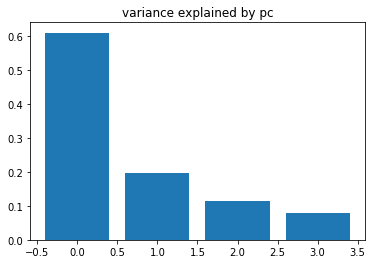

[[ 0.47372903  0.42768021  0.64105787  0.42628072]
 [ 0.43022586  0.39534827 -0.76388864  0.27400656]
 [ 0.69878982 -0.71241719  0.00174072 -0.06443215]
 [-0.31965498 -0.39147302 -0.07426924  0.8596823 ]]


In [26]:
# USING SKLEARN
sklearn_pca = sklearnPCA(n_components=4) # let's look at the first 4 components
pc = sklearn_pca.fit_transform(stocks_ret)

# plot the variance explained by pcs
plt.bar(range(4),sklearn_pca.explained_variance_ratio_)
plt.title('variance explained by pc')
plt.show()

# check the explained variance reatio
sklearn_pca.explained_variance_ratio_

# get the Principal components
pcs =sklearn_pca.components_

print(pcs)

In [ ]:
# first component
pc1 = pcs[0,:]
# normalized to 1 
pc_w = np.asmatrix(pc1/sum(pc1)).T

# apply our first componenet as weight of the stocks
pc1_ret = stocks_ret.values*pc_w

# plot the total return index of the first PC portfolio
pc_ret = pd.DataFrame(data =pc1_ret, index= stocks_ret.index)
pc_ret_idx = pc_ret+1
pc_ret_idx= pc_ret_idx.cumprod()
pc_ret_idx.columns =['pc1']

pc_ret_idx['indu'] = indu_index[1:]
pc_ret_idx.plot(subplots=True,title ='PC portfolio vs Market',layout =[1,2])

# plot the weights in the PC
weights_df = pd.DataFrame(data = pc_w*100,index = stocks_.columns)
weights_df.columns=['weights']
weights_df.plot.bar(title='PCA portfolio weights',rot =45,fontsize =8)